# Morphological Transformations

- simple ops. based on **binary** image shapes

In [87]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
img = cv2.imread('images/smarties.png', cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((4,4), np.uint8)

dilation = cv2.dilate(mask, kernel , iterations=2)  #blacks in white circles will be eliminated, but it may effect balls' sizes
erosion = cv2.erode(mask, kernel, iterations=1)     #blacks in white circles will be amplified
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # first erosion, then dilation applied.
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # first dilation, then erosion applied.

gradient = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel) #diff. b/w erosion and dilation
tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)   #diff. b/w binaryimage and opening

img.shape

(356, 413)

In [185]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #opencv reads BGR format default

In [186]:
images = [img, mask, dilation, erosion, opening, closing, gradient, tophat]
titles = ['orginal', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'gradient', 'tophat']

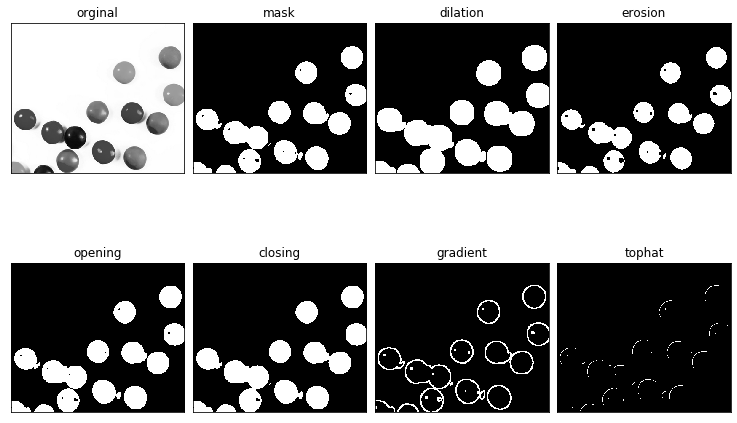

In [187]:
# basic grid adjustment
fig = plt.figure(figsize=(10, 10))

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.65, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.set_title(titles[i])
    ax.imshow(images[i], cmap=plt.cm.gray)
